In [1]:
import pandas as pd
df=pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [9]:
dummy=pd.get_dummies(df.town)

In [15]:
dummy=dummy.replace(True,1).replace(False,0)

C:\Users\Jeddah Pc\AppData\Local\Temp\ipykernel_14772\1664331820.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dummy=dummy.replace(True,1).replace(False,0)


In [16]:
dummy

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [21]:
concate=pd.concat([dummy,df],axis=1)

In [22]:
concate

,monroe township,robinsville,west windsor,town,area,price
0,1,0,0,monroe township,2600,550000
1,1,0,0,monroe township,3000,565000
2,1,0,0,monroe township,3200,610000
3,1,0,0,monroe township,3600,680000
4,1,0,0,monroe township,4000,725000
5,0,0,1,west windsor,2600,585000
6,0,0,1,west windsor,2800,615000
7,0,0,1,west windsor,3300,650000
8,0,0,1,west windsor,3600,710000
9,0,1,0,robinsville,2600,575000


In [25]:
concate.drop(["town","robinsville"],axis=1,inplace=True)

In [26]:
concate

,monroe township,west windsor,area,price
0,1,0,2600,550000
1,1,0,3000,565000
2,1,0,3200,610000
3,1,0,3600,680000
4,1,0,4000,725000
5,0,1,2600,585000
6,0,1,2800,615000
7,0,1,3300,650000
8,0,1,3600,710000
9,0,0,2600,575000


In [27]:
df=concate

In [28]:
df

,monroe township,west windsor,area,price
0,1,0,2600,550000
1,1,0,3000,565000
2,1,0,3200,610000
3,1,0,3600,680000
4,1,0,4000,725000
5,0,1,2600,585000
6,0,1,2800,615000
7,0,1,3300,650000
8,0,1,3600,710000
9,0,0,2600,575000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   monroe township  13 non-null     int64
 1   west windsor     13 non-null     int64
 2   area             13 non-null     int64
 3   price            13 non-null     int64
dtypes: int64(4)
memory usage: 548.0 bytes


In [42]:
x=df.drop(["price"],axis=1)
y=df["price"]

In [30]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [37]:
reg.fit(x,y)

LinearRegression()

In [48]:
reg.predict([[1,0,2600]])

C:\Users\Jeddah Pc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([539709.73984089])

In [50]:
reg.score(x,y)

0.9573929037221873

<Axes: >

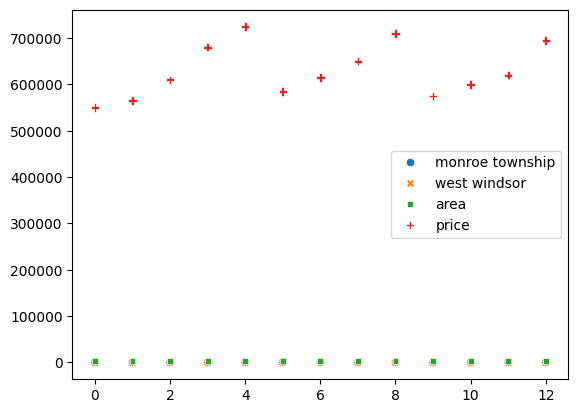

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(df)


In [59]:
df1=pd.read_csv("homeprices.csv")
df1

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dfle=df1
dfle.town=le.fit_transform(dfle.town)

In [90]:
x=dfle[["town"]].values
x

array([[0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [1]])

In [66]:
y=dfle["price"]

In [91]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

In [93]:
x=ohe.fit_transform(x).toarray()

In [95]:
x=x[:,1:]

In [100]:
area=dfle[["area"]].values

In [105]:
import numpy as np
x=np.hstack((x,area))

In [106]:
x

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [107]:
reg.fit(x,y)

LinearRegression()

In [111]:
reg.predict([[0,0,2600]])

array([539709.7398409])